# Better and correct use of GOES projection
[Issue #7](https://github.com/blaylockbk/goes2go/issues/7) and [Dicussion #6](https://github.com/blaylockbk/goes2go/discussions/6)

In [73]:
from goes2go.data import goes_latest
from goes2go.tools import abi_crs, field_of_view
import cartopy.crs as ccrs

In [74]:
G = goes_latest(satellite=17)
GLM = goes_latest(product='GLM')

 _______________________________
 | Satellite: noaa-goes17      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [1] files to [/p/cwfs/blaylock/data/noaa-goes17/ABI-L2-MCMIPC].
📚 Finished reading [1] files into xarray.Dataset.
 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: GLM-L2-LCFA      |
📦 Finished downloading [1] files to [/p/cwfs/blaylock/data/noaa-goes16/GLM-L2-LCFA].
📚 Finished reading [1] files into xarray.Dataset.


In [4]:
crs, x, y = abi_crs(G)
crs

In [8]:
vars(crs.globe)

{'datum': None,
 'ellipse': None,
 'semimajor_axis': 6378137.0,
 'semiminor_axis': 6356752.31414,
 'flattening': None,
 'inverse_flattening': 298.2572221,
 'towgs84': None,
 'nadgrids': None}

In [9]:
globe_kwargs = dict(
    semimajor_axis=G.goes_imager_projection.semi_major_axis,
    semiminor_axis=G.goes_imager_projection.semi_minor_axis,
    inverse_flattening=G.goes_imager_projection.inverse_flattening,
)
sat_height = G.goes_imager_projection.perspective_point_height
nadir_lon = G.geospatial_lat_lon_extent.geospatial_lon_nadir
nadir_lat = G.geospatial_lat_lon_extent.geospatial_lat_nadir

In [10]:
globe_kwargs

{'semimajor_axis': 6378137.0,
 'semiminor_axis': 6356752.31414,
 'inverse_flattening': 298.2572221}

In [39]:
globe = ccrs.Globe(ellipse='GRS90', **globe_kwargs)
vars(globe)

{'datum': None,
 'ellipse': 'GRS90',
 'semimajor_axis': 6378137.0,
 'semiminor_axis': 6356752.31414,
 'flattening': None,
 'inverse_flattening': 298.2572221,
 'towgs84': None,
 'nadgrids': None}

<xarray.Dataset>
Dimensions:                                 (y: 1500, x: 2500, number_of_time_bounds: 2, number_of_image_bounds: 2, band: 1)
Coordinates: (12/41)
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.1282 ... 0.04427
  * x                                       (x) float32 -0.1013 ... 0.03861
    y_image                                 float32 0.08624
    x_image                                 float32 -0.03136
    band_wavelength_C01                     (band) float32 ...
    ...                                      ...
    band_id_C15                             (band) int8 ...
    band_id_C16                             (band) int8 ...
    dataset_name                            <U74 'OR_ABI-L2-MCMIPC-M6_G16_s20...
    date_created                            <U22 '2021-08-18T14:49:05.3Z'
    time_coverage_start                     <U22 '2021-08-18T14:46:17.2Z'
    time_coverage_end                       <U22 '2021-08-18T14:48:55.1Z'
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds, band
Data variables: (12/125)
    CMI_C01                                 (y, x) float32 ...
    DQF_C01                                 (y, x) float32 ...
    CMI_C02                                 (y, x) float32 ...
    DQF_C02                                 (y, x) float32 ...
    CMI_C03                                 (y, x) float32 ...
    DQF_C03                                 (y, x) float32 ...
    ...                                      ...
    std_dev_brightness_temperature_C16      float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    dynamic_algorithm_input_data_container  int32 ...
    algorithm_product_version_container     int32 ...
    filename                                <U112 'noaa-goes16/ABI-L2-MCMIPC/...
Attributes: (12/25)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    keywords:                  ATMOSPHERE > ATMOSPHERIC RADIATION > REFLECTAN...
    cdm_data_type:             Image
    processing_level:          National Aeronautics and Space Administration ...
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        571f3017-95d6-4a04-adf8-9f6fd33e6046

In [18]:
abi_crs(G)

(<cartopy.crs.Geostationary at 0x2b576c017400>,
 <xarray.DataArray 'x' (x: 2500)>
 array([-3626269.5, -3624265.5, -3622261.5, ...,  1377762. ,  1379766. ,
         1381770. ], dtype=float32)
 Coordinates:
     t                    datetime64[ns] ...
   * x                    (x) float32 -3.626e+06 -3.624e+06 ... 1.382e+06
     y_image              float32 0.08624
     x_image              float64 -1.122e+06
     dataset_name         <U74 'OR_ABI-L2-MCMIPC-M6_G16_s20212301456172_e20212...
     date_created         <U22 '2021-08-18T14:59:05.0Z'
     time_coverage_start  <U22 '2021-08-18T14:56:17.2Z'
     time_coverage_end    <U22 '2021-08-18T14:58:54.5Z'
     metpy_crs            object Projection: geostationary
 Attributes:
     units:          meter
     axis:           X
     long_name:      GOES fixed grid projection x-coordinate
     standard_name:  projection_x_coordinate,
 <xarray.DataArray 'y' (y: 1500)>
 array([4588198. , 4586194. , 4584190. , ..., 1588183.8, 1586179.9, 1584175.

In [19]:
abi_crs(GLM)

KeyError: 'CMI_C01'

In [25]:
import metpy

In [33]:
GLM.metpy.parse_cf('flash_lat')

Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable


<xarray.DataArray 'flash_lat' (number_of_flashes: 87)>
array([ 4.934663e-01, -2.040453e+00, -3.843661e+01, -1.729552e+00,
       -3.135265e+01,  3.761042e+01,  2.879182e+01, -3.231708e+01,
        3.499237e+01,  1.123497e+01, -3.871516e+01,  4.362499e+01,
       -1.220515e+00, -3.182599e+01, -3.140679e+01,  5.217135e+01,
        5.172521e+01, -3.829185e+01, -3.812366e+01,  7.385352e+00,
        9.441918e-01, -1.959023e+00,  5.217228e+01,  1.618826e+01,
        1.844898e+01, -3.146441e+01, -3.085204e+01, -2.832633e+01,
       -3.069679e+01,  3.431741e+01, -1.808343e-01, -2.648562e+00,
       -5.072425e-01, -3.863389e+01,  1.429651e+00, -3.154844e+01,
       -3.895252e+01, -1.274475e+00,  3.976786e+01,  4.028704e+01,
       -1.405088e+00, -2.991444e+01, -2.900623e+01, -1.715983e+00,
       -3.854973e+01, -3.845679e+01,  1.625430e+01, -3.220324e+01,
        3.481413e+01, -3.037064e+01, -3.166238e+01,  3.411690e+01,
        5.244620e+01,  3.224018e+01,  5.228348e+01,  1.886122e+01,
        3.490050e+01,  5.242350e+01, -3.807574e+01,  5.253308e+01,
        5.325049e+01, -2.841479e+01, -3.186243e+01, -2.915901e+01,
       -3.194858e+01,  1.633182e+01,  1.625266e+01, -3.931109e+01,
        6.225402e-02,  1.865372e+01, -3.855005e+01, -3.006602e+01,
        5.258488e-02, -3.156245e+01,  1.623094e+01,  3.956713e+01,
       -1.771396e+00, -3.222928e+01, -3.064143e+01, -3.160113e+01,
        5.185714e+01, -3.149574e+01,  3.318635e+01, -2.276520e-01,
       -1.771687e+00,  4.018392e+01,  3.432710e+01], dtype=float32)
Coordinates: (12/16)
    flash_id                          (number_of_flashes) uint16 25999 ... 26118
    flash_time_offset_of_first_event  (number_of_flashes) datetime64[ns] 2021...
    flash_time_offset_of_last_event   (number_of_flashes) datetime64[ns] 2021...
    flash_lat                         (number_of_flashes) float32 0.4935 ... ...
    flash_lon                         (number_of_flashes) float32 -66.5 ... -...
    product_time                      datetime64[ns] 2021-08-18T15:01:40
    ...                                ...
    lon_field_of_view                 float32 -75.0
    dataset_name                      <U69 'OR_GLM-L2-LCFA_G16_s2021230150140...
    date_created                      <U22 '2021-08-18T15:02:02.3Z'
    time_coverage_start               <U22 '2021-08-18T15:01:40.0Z'
    time_coverage_end                 <U22 '2021-08-18T15:02:00.0Z'
    metpy_crs                         object Projection: latitude_longitude
Dimensions without coordinates: number_of_flashes
Attributes:
    long_name:      GLM L2+ Lightning Detection: flash centroid (mean constit...
    standard_name:  latitude
    units:          degrees_north
    axis:           Y

In [31]:
_.metpy.cartopy_crs

In [34]:
_.x

AttributeError: 'DataArray' object has no attribute 'x'

In [36]:
G.metpy.cartopy_crs

AttributeError: 'MetPyDatasetAccessor' object has no attribute 'cartopy_crs'

<xarray.Dataset>
Dimensions:                                 (y: 1500, x: 2500, number_of_time_bounds: 2, number_of_image_bounds: 2, band: 1)
Coordinates: (12/41)
    t                                       datetime64[ns] 2021-08-18T14:57:3...
  * y                                       (y) float32 0.1282 ... 0.04427
  * x                                       (x) float32 -0.1013 ... 0.03861
    y_image                                 float32 0.08624
    x_image                                 float32 -0.03136
    band_wavelength_C01                     (band) float32 0.47
    ...                                      ...
    band_id_C15                             (band) int8 15
    band_id_C16                             (band) int8 16
    dataset_name                            <U74 'OR_ABI-L2-MCMIPC-M6_G16_s20...
    date_created                            <U22 '2021-08-18T14:59:05.0Z'
    time_coverage_start                     <U22 '2021-08-18T14:56:17.2Z'
    time_coverage_end                       <U22 '2021-08-18T14:58:54.5Z'
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds, band
Data variables: (12/125)
    CMI_C01                                 (y, x) float32 ...
    DQF_C01                                 (y, x) float32 ...
    CMI_C02                                 (y, x) float32 ...
    DQF_C02                                 (y, x) float32 ...
    CMI_C03                                 (y, x) float32 ...
    DQF_C03                                 (y, x) float32 ...
    ...                                      ...
    std_dev_brightness_temperature_C16      float64 15.44
    percent_uncorrectable_GRB_errors        float64 0.0
    percent_uncorrectable_L0_errors         float64 0.0
    dynamic_algorithm_input_data_container  int32 -2147483647
    algorithm_product_version_container     int32 -2147483647
    filename                                <U112 'noaa-goes16/ABI-L2-MCMIPC/...
Attributes: (12/25)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    keywords:                  ATMOSPHERE > ATMOSPHERIC RADIATION > REFLECTAN...
    cdm_data_type:             Image
    processing_level:          National Aeronautics and Space Administration ...
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        7e1ee5b7-3c8e-4c17-b1fe-efb643eb2b83

In [75]:
FOV, crs = field_of_view(G)

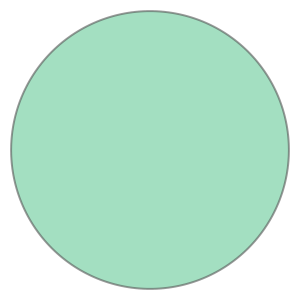

In [76]:
FOV

In [77]:
crs

In [50]:
G.x

<xarray.DataArray 'x' (x: 2500)>
array([-0.101332, -0.101276, -0.10122 , ...,  0.0385  ,  0.038556,  0.038612],
      dtype=float32)
Coordinates:
    t                    datetime64[ns] 2021-08-18T14:57:35.933910016
  * x                    (x) float32 -0.1013 -0.1013 -0.1012 ... 0.03856 0.03861
    y_image              float32 0.08624
    x_image              float32 -0.03136
    dataset_name         <U74 'OR_ABI-L2-MCMIPC-M6_G16_s20212301456172_e20212...
    date_created         <U22 '2021-08-18T14:59:05.0Z'
    time_coverage_start  <U22 '2021-08-18T14:56:17.2Z'
    time_coverage_end    <U22 '2021-08-18T14:58:54.5Z'
Attributes:
    units:          rad
    axis:           X
    long_name:      GOES fixed grid projection x-coordinate
    standard_name:  projection_x_coordinate

In [52]:
import matplotlib.pyplot as plt
import numpy as np

In [54]:
x, y = np.meshgrid(G.x, G.y)
plt.pcolormesh(x, y, x*y)

<ipython-input-54-0c049317bd74>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, x*y)


In [58]:
from shapely.geometry import Polygon

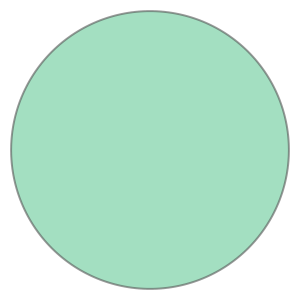

In [61]:
FOV

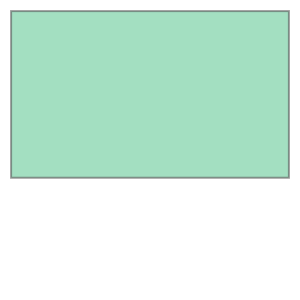

In [78]:
sat_height = G.goes_imager_projection.perspective_point_height
dom = Polygon([
    (G.x[0]*sat_height, G.y[0]*sat_height),
    (G.x[0]*sat_height, G.y[-1]*sat_height),
    (G.x[-1]*sat_height, G.y[-1]*sat_height),
    (G.x[-1]*sat_height, G.y[0]*sat_height)
])
dom

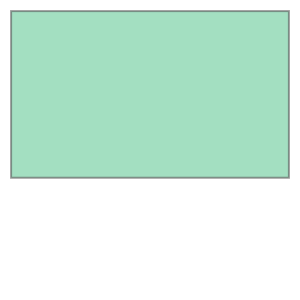

In [79]:
FOV.intersection(dom)

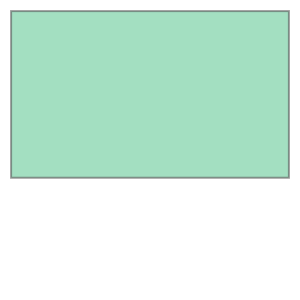

In [80]:
dom.intersection(FOV)

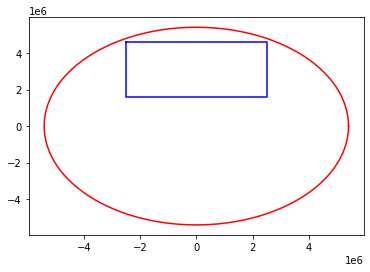

In [81]:
x, y = FOV.exterior.xy
plt.plot(x, y, c="red")

x, y = dom.exterior.xy
plt.plot(x, y, c="blue")

In [1]:
a = dict(a=1, b=3)

In [2]:
'a' in a

True